## Network Literacy

A network consists of two types of objects: nodes and edges
<img src='Images/network.png'>

* Nodes (or vertices, actors, ...): the entities under study such as genes, people, countries, computers, and webpages.
* Edges (or links, ties, connections, arcs, ...): the relationships between the entities.

Depending on the type of nodes, networks can be classified as:

* Bi-partite: there are two types of nodes and edges only exist between nodes of different types.
<img src='Images/bipartite.png'>

* Multi-partite: there are multiple types of nodes and edges only exist between nodes of different types.

Depending on the nature of edges, networks can be classified as:

* Directed: if the edges have directions.

* Signed: if the edges are of any binary status such as  positive or negative.

* Weighted: if each edge is associated with a weight, which is normally a continuous number.

* Multiplex: if there could be multiple edges between two nodes.

* Hypergraphs: if an edge can connect (or combine) more than two nodes.

### Network Construction

* Explicit relationship
* Implicit relationship

#### Explicit relationship

* "Physical" connections: wires, hyperlinks, etc.

* Online friendship: who followed whom, who "liked" whom.

* Online behavior: who listened to what music, who watched what movie, who read what book.

* Offline behavior traced digitally: proximity of wearables or cell phones. 

##### Measure relationship directly 😄

#### Explicit relationship

* Interactions not tracked digitally

##### Use surveys ☹

* Name generator: list the 3 people that ...

#### Survey

* Ego-centric design
    * Similar to traditional surveys
    * Limited analysis

* Bounded network design
    * Better capture network structures
    * Limited sample size

* Respondent-driven sampling (RDS)
    * Similar to snowball sampling, often used to sample hard-to-reach groups 
    * May yield biased view of the underlying network

#### Social Network Data Collection

<table>
    <tr>
        <td><img src='Images/socialnetworkdata.jpg'></td>
        <td><img src='Images/netcanvas.png'></td>
    </tr>
</table>

#### Implicit Relationship

* Correlation between time series such as stock prices, neuron activities.

* Statistical relationships between variables
<img src='Images/child.png'>

* **Mixed graphical model**

### Network Data Storage

* Adjacency matrix: convenient for computation but not efficent for data storage (why?)
<table>
    <tr>
        <td><img src='Images/triad2.png'></td>
        <td><img src='Images/matrix2.png' width=200></td>
    </tr>
</table>

* Incidence matrix: a $|E|\times |V|$ matrix $I$,where $I_{ij} =1$ if edge $i$ contains node $j$ and $I_{ij} = 0$ otherwise. For directed networks, the source node will have an entry of -1 instead of 1.
<table>
    <tr>
        <td><img src='Images/triad2.png'></td>
        <td><img src='Images/incidence.png' width=260></td>
    </tr>
</table>

* Adjacency list: a table with one row per node. The first number in a row represents the focal node, and the numbers following it represent all the nodes to which it connects.  
1  2  3 (node 1 is connected to 2 and 3)  
2  3    (node 2 is connected to 3)

* Edgelist: a two-column table, with each row representing an edge and the two numbers in each row representing the two end nodes of the edge.  
1 2     
2 3  <img src='Images/triad2.png'>

* GraphML, GML, GEXF, ...
* **Node table and edge table**
    * Node table: metadata about the nodes.
    * Edge table: edge list with metadata about edges.

### Visualization


* Gephi: 
    + allow to change node and edge visual properties such as size and color, but cannot change node shape
    + simple analytics
    + good network layouts (i.e., positions of nodes)
    + native support of temporal networks
* Cytoscape: can do everything Gephi does, and allow to change node shape, but less friendly to use
* UCINET, Pajek, ...
* For the web: D3js, sigmajs.

### Mathematical Formulation of Networks

* $V = (1,2,\cdots,N)$: set of nodes.
* $E \subset V \times V$: set of edges.
* Adjacency matrix $A$:
$$
A_{ij} =
\left\{
	\begin{array}{ll}
		1  & \mbox{if there is an edge between node } i \mbox{ and node } j\\
		0 & \mbox{otherwise}
	\end{array}
\right.
$$

* What if the network is directed, weighted, or multiplex?

### Basic Concepts

#### Density

For a network with $N$ nodes and $M$ edges, its **density** is defined as $\frac{M}{N(N-1)/2}$ for an undirected network, and $\frac{M}{N(N-1)}$ for a directed network.

* It can be used to capture the growth of connections in a population.
* Networks with a density of 1 are called **complete networks**.

#### Walk

A **walk** from nodes $v_0$ to $v_T$ is a sequence of nodes $v_0, v_1, \cdots, v_T$ such that for any two consecutive nodes $v_i$, $v_{i+1}$ in this sequence there is an edge connecting $v_i$ to $v_{i+1}$.

<img src='Images/walk.jpg'>

The **length** of a walk is the number of edges in the walk.

#### Paths

* Walks in which all the nodes are distinct are called **paths**.
* Walks in which all the nodes are distinct except for the starting and the ending nodes are called **cycles**.
* The **distance** between two nodes is the length of the shortest path between the nodes.
* The **diameter** of a network is the largest distance among all pairs of nodes.
* The famous "six degrees of separation".

#### Connectivity

* A network is **connected** if there exists a path between any pair of nodes
* A **connected component** is a subset of nodes in which there exists a path between any pair of nodes and there is no path between nodes in this subset and nodes outside.

#### Neighbors

* Nodes that are directly connected to a node are called the **neighbors** of the node.
* The number of neighbors (or edges) of a node is called the **degree** of the node.
    * For directed network, the degree of a node can be decomposed into **in-degree**, the number of edges pointing to the node, and **out-degree**, the number of edges going out of the node.
    * For weighted networks, the degree of a node has a weighted version - **strength** - which is the sum of the weights of all the edges incident on the node.
* Degree distribution is very heterogeneous for many real networks. 

### Example: Florentine Family Marriage Network

* Nodes: Renaissance Florentine families in around 1430.
* Edges: marriage ties between the families.

A network of Renaissance Florentine families in around 1430. The families are nodes and marriage ties between the families are edges in the network.

Side Note: network analysis packages in R or Python

* igraph
    + Backend in C, fast
    + Cross language - C/C++, python, R
    + Good at programing and calculations with network data
* NetworkX
    + Alternative to igraph
    + Native in python, and python only
    + Good documentation
* Statnet
    + Good at statistical modeling of networks, espcially the exponential random graph model

In [2]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



First, load the node table and the edge table into R

In [3]:
nodes = read.csv('dataset-florentine-1994-nodes.csv')
edges = read.csv('dataset-florentine-1994-edges.csv')

Next, turn the node and edge tables into a network object

In [4]:
G = graph_from_data_frame(d=edges, vertices=nodes, directed=F)

Check out the summary of the network

In [5]:
summary(G)

IGRAPH 0732132 UN-- 16 20 -- 
+ attr: name (v/c), label (v/c), wealth (v/n), priorates (v/n),
| totalties (v/n)


Side note: What do those mean? 

* igraph website http://igraph.org/r/doc/
* A good reference book on igraph: [Statistical network analysis with igraph](https://sites.fas.harvard.edu/~airoldi/pub/books/BookDraft-CsardiNepuszAiroldi2016.pdf)

Any column after the first one in the node table will be used as attributes for the nodes, and any column after the second in the edge table will be used as attributes for the edges. Here we want to manually specify the name of each node using the “label” column in the node table:

Set the name of each node using the “label” column in the node table:

In [6]:
V(G)$name = as.character(nodes$label)

* The nodes can be accessed by V().
* The edges can be accessed by E().

The network can be plotted by:

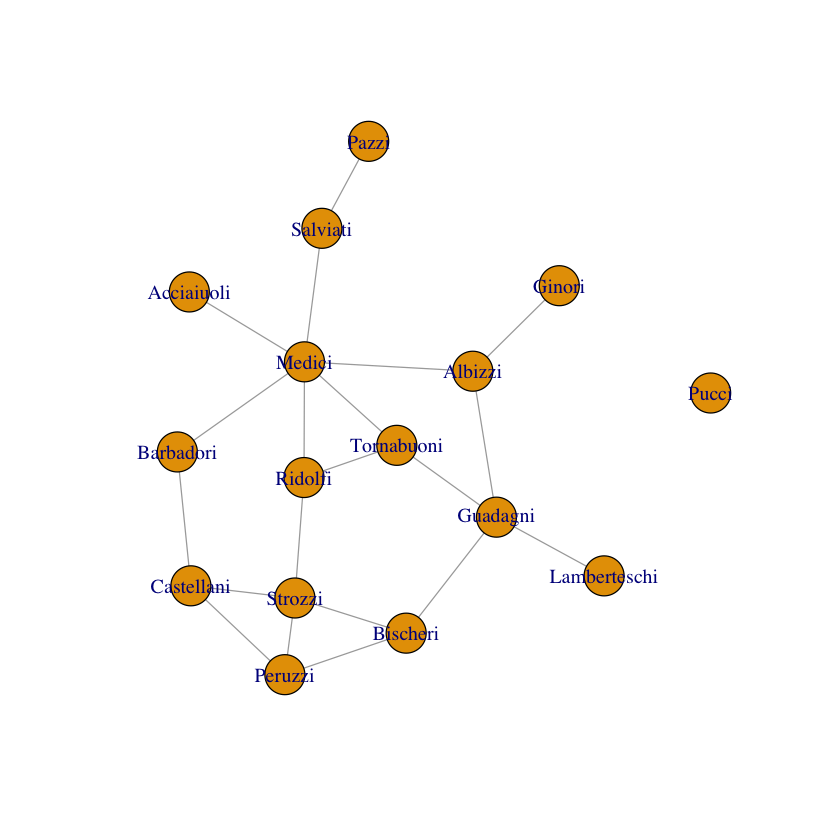

In [7]:
plot(G)

More visual specifications:

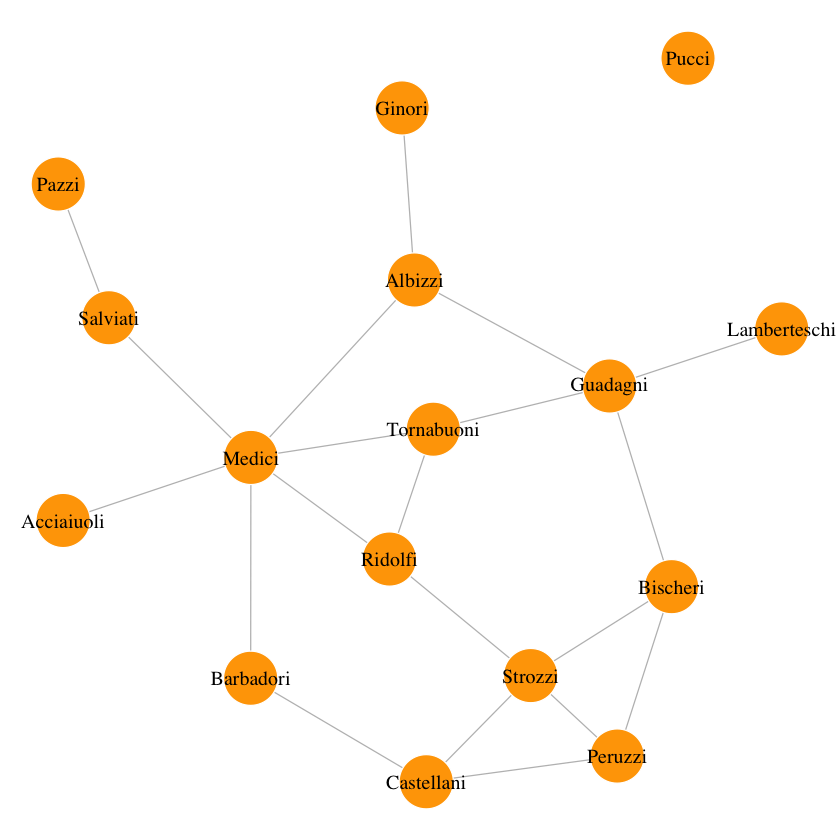

In [15]:
par(mar=c(0,0,0,0))
plot(G, edge.color="grey", vertex.color="orange", vertex.frame.color="#ffffff",vertex.label.color="black")

Change layout:

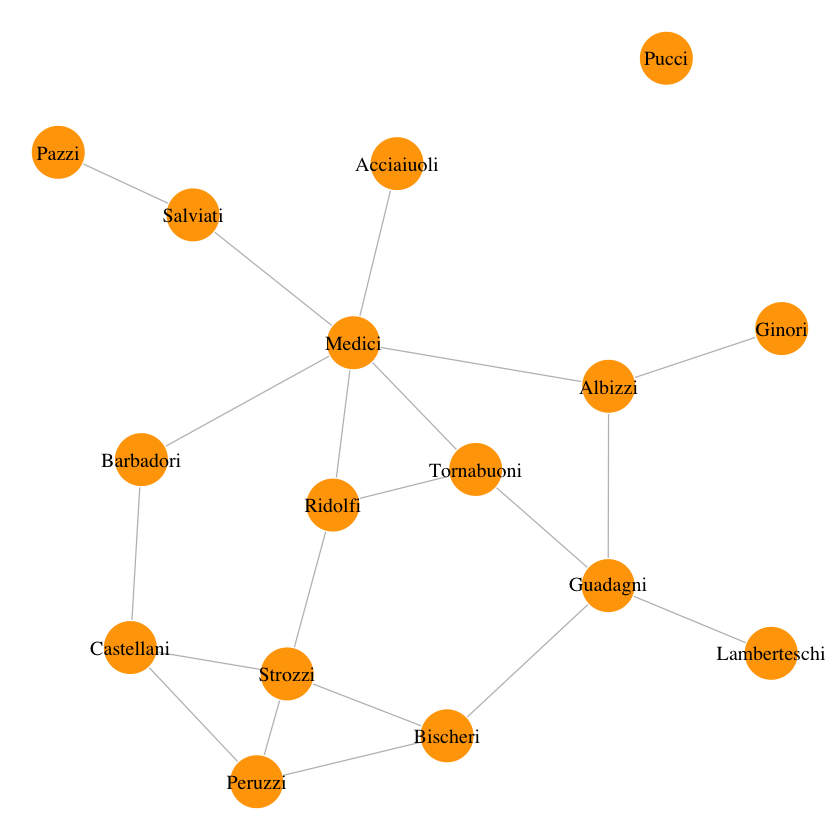

In [17]:
par(mar=c(0,0,0,0))
plot(G ,edge.color="grey", vertex.color="orange", vertex.frame.color="#ffffff",vertex.label.color="black", layout=layout_with_fr(G))

Interactive plot

In [ ]:
qtplot(G)

More about plotting

* http://igraph.org/r/doc/plot.common.html
* A fantastic [tutorial](http://kateto.net/network-visualization) by Katherine Ognyanova

Now back to the descriptives:

In [9]:
print(paste('Edge density:', edge_density(G)))
print(paste('Network diameter:', diameter(G)))
print(paste('Average distance:', mean_distance(G)))

[1] "Edge density: 0.166666666666667"
[1] "Network diameter: 5"
[1] "Average distance: 2.48571428571429"


The distance between any two nodes can be calculated with the “distances” command. For example, the distance between the families Medici and Peruzzi can be obtained by:

In [10]:
distances(G, v = 'Medici', to = 'Peruzzi')

,Peruzzi
Medici,3


Finally, we examine the local neighborhood of a node. 

The neighbors of a specific node (e.g., Medici) can be found by:

In [11]:
neighbors(G, 'Medici')

+ 6/16 vertices, named, from 0732132:
[1] Acciaiuoli Albizzi    Barbadori  Ridolfi    Salviati   Tornabuoni

The degree of each node in this network can be calculated by:

In [12]:
degree(G)

Acciaiuoli      Albizzi    Barbadori     Bischeri   Castellani       Ginori 
           1            3            2            3            3            1 
    Guadagni Lamberteschi       Medici        Pazzi      Peruzzi        Pucci 
           4            1            6            1            3            0 
     Ridolfi     Salviati      Strozzi   Tornabuoni 
           3            2            4            3

### Excercise

Visualize the network with node size proportional to degree and node color denoting to wealth

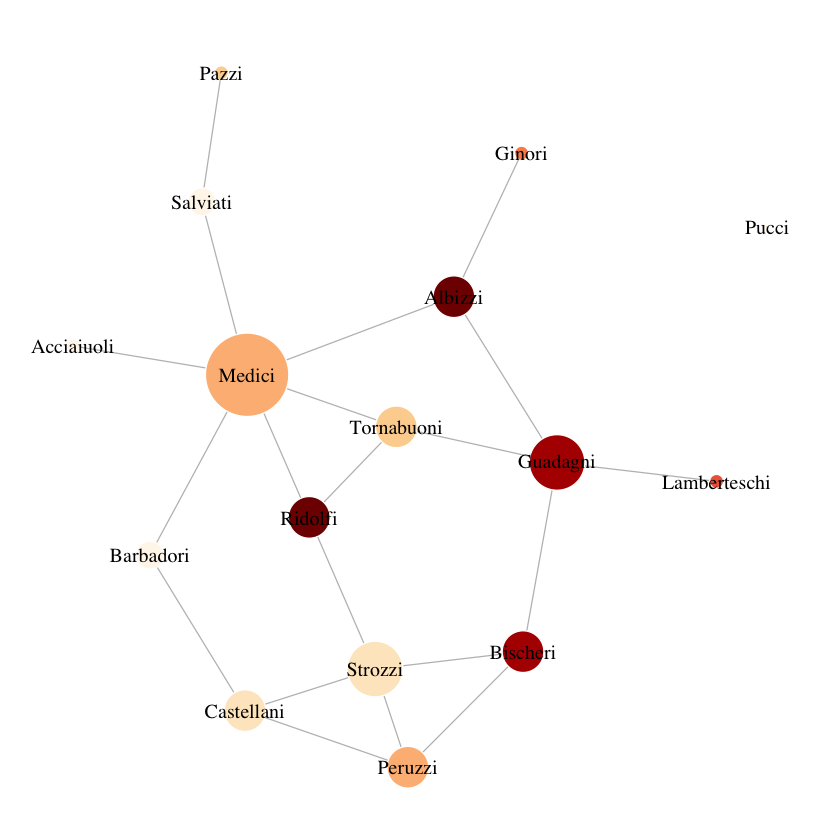

In [28]:
par(mar=c(0,0,0,0))
plot(G, vertex.size=degree(G)*4, edge.color="grey", vertex.color=V(G)$wealth, vertex.frame.color="#ffffff",vertex.label.color="black",palette=sequential_pal(9))